# Simple wave motion and the wave equation

## 6.1 Types of wave

In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mplines
import matplotlib.patches as patches



#Animations
from matplotlib import animation, rc
from IPython.display import HTML, Image

In [3]:
# Useful matplotlib page
# https://e2eml.school/matplotlib_framing.html

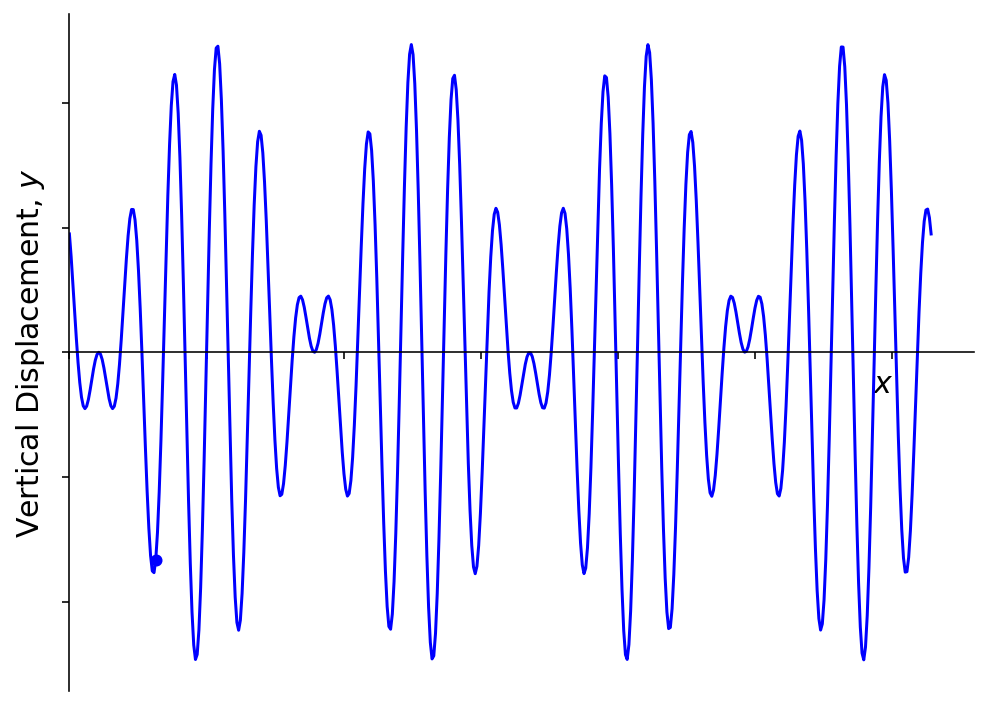

In [11]:
limit_x = 4*np.pi
disp_x = np.linspace(0,limit_x,500)
omega_1 = 1
omega_2 = 10
delta_1 = 0
k_1 = 1
k_2 = 10
A_0 = 5
size_of_font = 15
sample = 50
time_coord = 2

def wave(displacement, time):
    y = A_0*np.cos(k_1*displacement - omega_1*time)*np.sin(k_2*displacement - omega_2*time)
    return y

fig = plt.figure(figsize=(7,5))

ax = plt.axes()
#ax = fig.add_axes((0, 0, 1, 1))



ax.set_ylabel('Vertical Displacement, $y$',fontsize=size_of_font)
ax.set_xlabel('$x$',fontsize=size_of_font)
ax.xaxis.set_label_coords(0.9, 0.5-0.025)

ax.plot(disp_x, wave(disp_x,time_coord),color='blue')

ax.plot(disp_x[sample],wave(disp_x[sample],time_coord),'o',color='blue',markersize=5)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_position(("data",0))
ax.spines["bottom"].set_position(("data",0))



ax.set_xticklabels([])
ax.set_yticklabels([])
#ax.plot(t, shm(t,delta_2),color='orange')

ax.set_xlim(0,)
#ax.set_ylim(0,)

plt.tight_layout()
#plt.savefig('ch6-wavemotion1.pdf',transparent=True)
#plt.savefig('ch6-wavemotion1.png',transparent=True)
#plt.savefig('ch6-wavemotion1.svg',transparent=True)
plt.show()





Let's try doing an animation.  From https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c

Currently in testing stage; moving on...

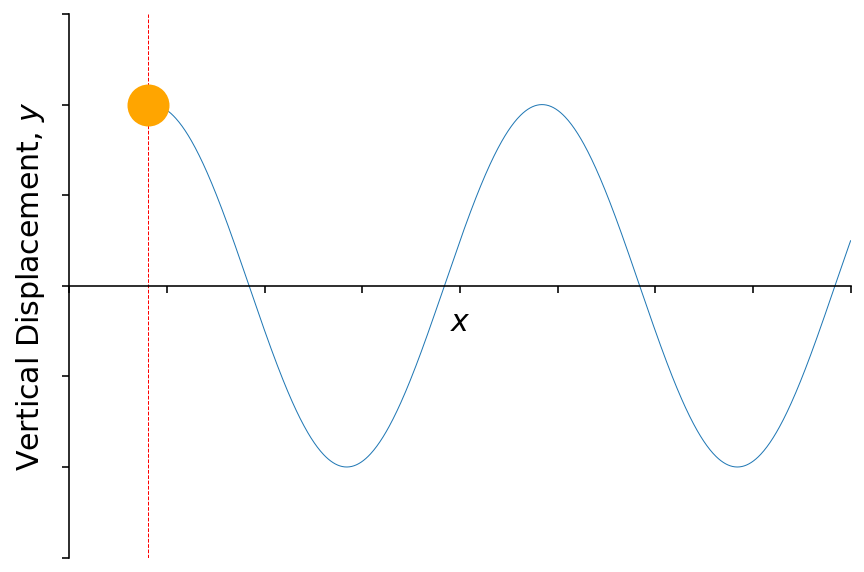

In [15]:
### Using http://louistiao.me/posts/notebooks/save-matplotlib-animations-as-gifs/

## Steps I'm doing to make it work:
## 1. Installing homebrew
## 2. brew install imagemagick
## 3. brew install ffmpeg

size_of_font = 15

duration_of_anim = 2 #seconds
frames_per_second = 10

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
sample = 100
number_of_points = 1000
x_limit = 2

x = np.linspace(0, 2, 1000)

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(7,5))

ax.set_xlim(( 0, 2))
ax.set_ylim((-1.5, 1.5))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylabel('Vertical Displacement, $y$',fontsize=size_of_font)
ax.set_xlabel('$x$',fontsize=size_of_font)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_position(("data",0))
ax.spines["bottom"].set_position(("data",0))

ax.axvline(x=x[sample],linewidth=0.5,color='r',linestyle="--")



line, = ax.plot([], [], lw=0.5,linestyle='-')

point, = ax.plot([],[],'o',markersize=20,color='orange')

#ax.plot(disp_x[sample],wave(disp_x[sample],time_coord),'o',color='blue',markersize=5)



# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    point.set_data([],[])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    y = np.sin(2 * np.pi * (x - 0.04 * i)) # The scalar on i helps us with the frame rates! scalar*frames must equal 1
    y_point=np.sin(2*np.pi*(x[sample]-0.04*i)) 
    line.set_data(x[sample:], y[sample:])
    point.set_data(x[sample],y_point)
    return (line,)


# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=25, interval=20, blit=True)
#anim
anim.save('ch6-transversewave3.gif', writer='imagemagick', fps=15)
plt.savefig('ch6-transversewave3.pdf',transparent=True)


MovieWriter stderr:
convert: unexpected end-of-file '-': No such file or directory @ error/rgb.c/ReadRGBImage/247.
convert: no images defined `ch6-transversewave2.gif' @ error/convert.c/ConvertImageCommand/3285.



CalledProcessError: Command '['convert', '-size', '504x360', '-depth', '8', '-delay', '6.666666666666667', '-loop', '0', 'rgba:-', 'ch6-transversewave2.gif']' returned non-zero exit status 1.

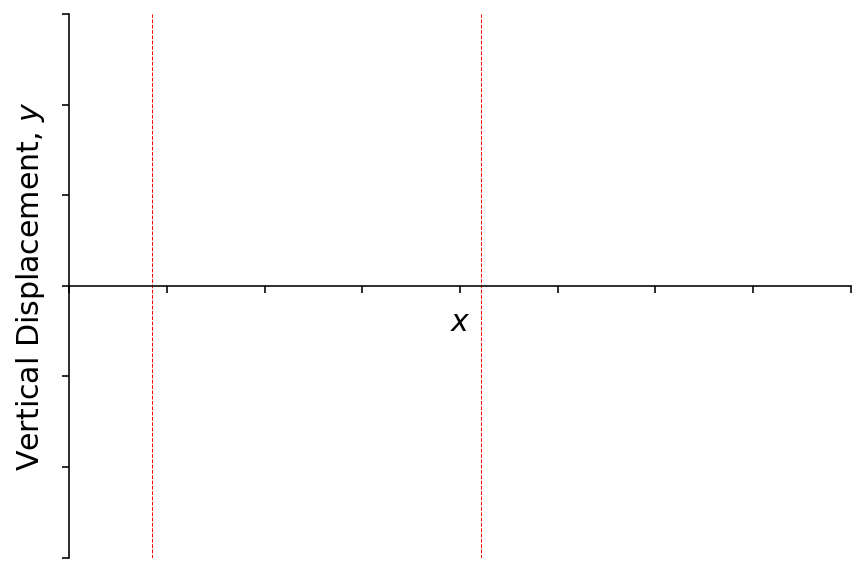

In [15]:
size_of_font = 15

duration_of_anim = 2 #seconds
frames_per_second = 10

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
sample1 = 2
sample2 = 10
number_of_points = 20
x_limit = 2

x = np.linspace(0, 2, 20)

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(7,5))

ax.set_xlim(( 0, 2))
ax.set_ylim((-1.5, 1.5))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylabel('Vertical Displacement, $y$',fontsize=size_of_font)
ax.set_xlabel('$x$',fontsize=size_of_font)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_position(("data",0))
ax.spines["bottom"].set_position(("data",0))

ax.axvline(x=x[sample1],linewidth=0.5,color='r',linestyle="--")
ax.axvline(x=x[sample2],linewidth=0.5,color='r',linestyle="--")




line, = ax.plot([], [], lw=0.5,linestyle='-')

point, = ax.plot([],[],'o',markersize=20,color='orange')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    point.set_data([],[])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    y = np.sin(2 * np.pi * (x - 0.04 * i)) # The scalar on i helps us with the frame rates! scalar*frames must equal 1
    y_point=np.sin(2*np.pi*(x[sample]-0.04*i)) 
#    line.set_data(x, y)
    point.set_data(x,y)
    return (point,)


# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=25, interval=20, blit=True)
# Frames number and animate scalar must multiply to 1

#anim
anim.save('ch6-transversewave2.gif', writer='imagemagick', fps=15)
#plt.savefig('ch6-transversewave2.pdf',transparent=True)


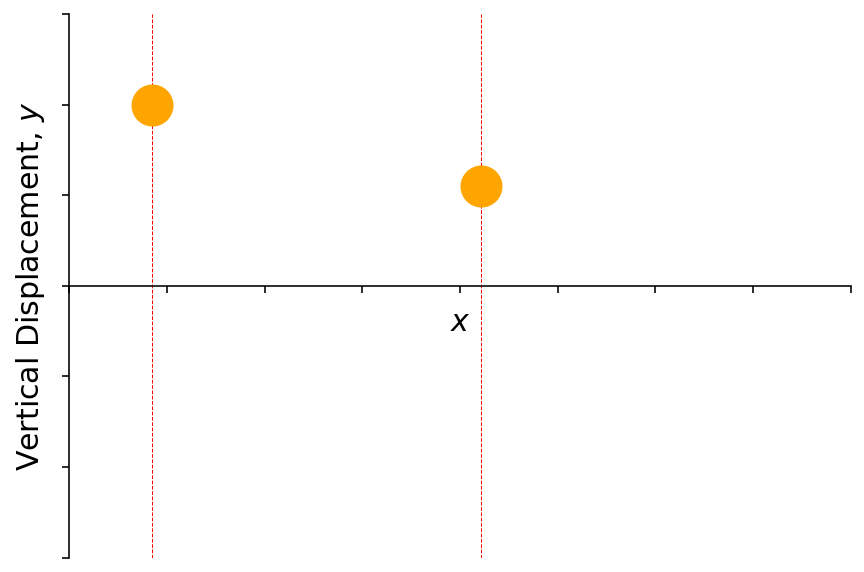

In [21]:
size_of_font = 15

duration_of_anim = 2 #seconds
frames_per_second = 10

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
sample1 = 2
sample2 = 10
number_of_points = 20
x_limit = 2

x = np.linspace(0, 2, 20)

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(7,5))

ax.set_xlim(( 0, 2))
ax.set_ylim((-1.5, 1.5))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylabel('Vertical Displacement, $y$',fontsize=size_of_font)
ax.set_xlabel('$x$',fontsize=size_of_font)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_position(("data",0))
ax.spines["bottom"].set_position(("data",0))

ax.axvline(x=x[sample1],linewidth=0.5,color='r',linestyle="--")
ax.axvline(x=x[sample2],linewidth=0.5,color='r',linestyle="--")





line, = ax.plot([], [], lw=0.5,linestyle='-')

point1, = ax.plot([],[],'o',markersize=20,color='orange')
point2, = ax.plot([],[],'o',markersize=20,color='orange')



# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    point1.set_data([],[])
    point2.set_data([],[])
    return (line,)

# animation function. This is called sequentially
def animate(i):
#    y = np.sin(2 * np.pi * (x - 0.01 * i)) # The scalar on i helps us with the frame rates! scalar*frames must equal 1
    y_point1=np.sin(2*np.pi*(x[sample1]-0.04*i)) 
    y_point2=np.sin(2*np.pi*(x[sample2]-0.04*i)) 
#    line.set_data(x, y)
    point1.set_data(x[sample1],y_point1)
    point2.set_data(x[sample2],y_point2)
    return (point1,point2,)


# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=25, interval=20, blit=True)
#anim
anim.save('ch6-transversewave1.gif', writer='imagemagick', fps=15)
plt.savefig('ch6-transversewave1.pdf',transparent=True)



## Wave pulses

Wanting to plot a longitudinal and transverse wave pulse

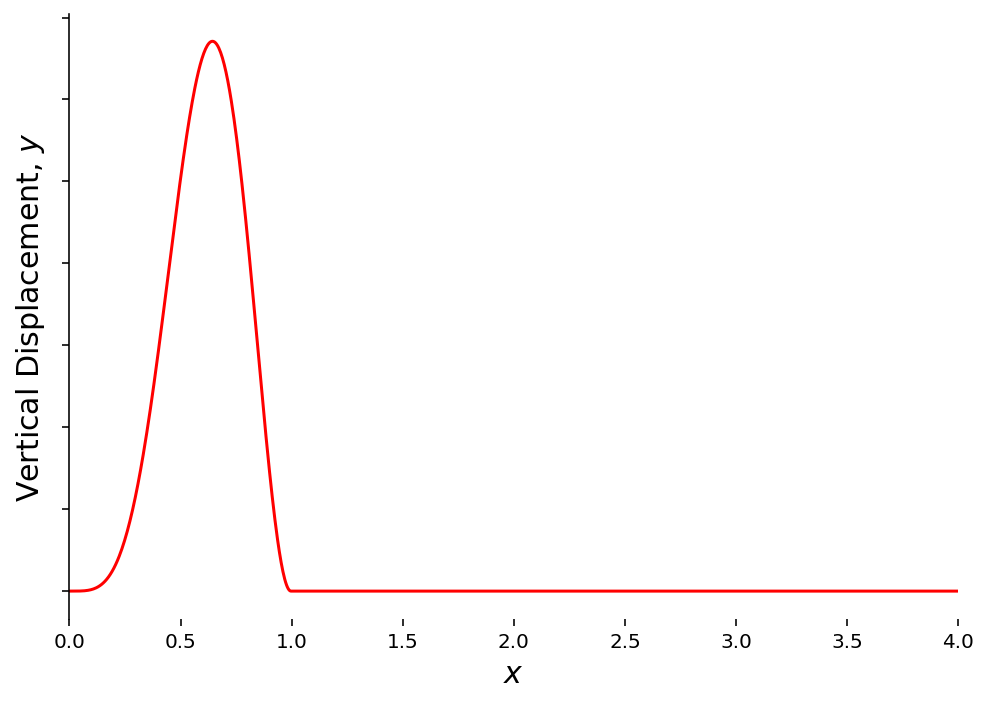

In [5]:
data_points = 1000
x_data_range = np.linspace(0,4,data_points)
x_pulse_range = np.linspace(0,1,250)
amplitude = 1
x_pulse_func = x_pulse_range*x_pulse_range*amplitude*(np.sin(x_pulse_range*np.pi))**2 
time_coord = 0
size_of_font = 15


#x_pulse_range = np.linspace(0,np.pi,250)
#x_data_range = np.linspace(0,2*np.pi,data_points)
#amplitude = 1
#x_pulse_func = x_pulse_range*x_pulse_range*amplitude*(np.sin(x_pulse_range))**2 
#time_coord = 50


# Approach to create pulse:
# 1. Create a zero array
zero_arr = np.zeros(data_points,dtype=float)
# 2. Write the pulse into array at time coordinate t
pulse_arr = np.insert(zero_arr,time_coord,x_pulse_func)
# 3. Truncate the array at full length
pulse_arr_trunc = pulse_arr[:data_points]

fig = plt.figure(figsize=(7,5))

ax = plt.axes()
#ax = fig.add_axes((0, 0, 1, 1))



ax.set_ylabel('Vertical Displacement, $y$',fontsize=size_of_font)
ax.set_xlabel('$x$',fontsize=size_of_font)
#ax.xaxis.set_label_coords(0.9, 0.5-0.025)

#ax.plot(x_pulse_range, pulse_arr_trunc,color='blue')
ax.plot(x_data_range, pulse_arr_trunc,color='red')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)


#ax.spines["left"].set_position(("data",0))
#ax.spines["bottom"].set_position(("data",0))



#ax.set_xticklabels([])
ax.set_yticklabels([])
#ax.plot(t, shm(t,delta_2),color='orange')

ax.set_xlim(0,4)
#ax.set_ylim(0,)

plt.tight_layout()
#plt.savefig('ch6-wavemotion1.pdf',transparent=True)
#plt.savefig('ch6-wavemotion1.png',transparent=True)
#plt.savefig('ch6-wavemotion1.svg',transparent=True)
plt.show()






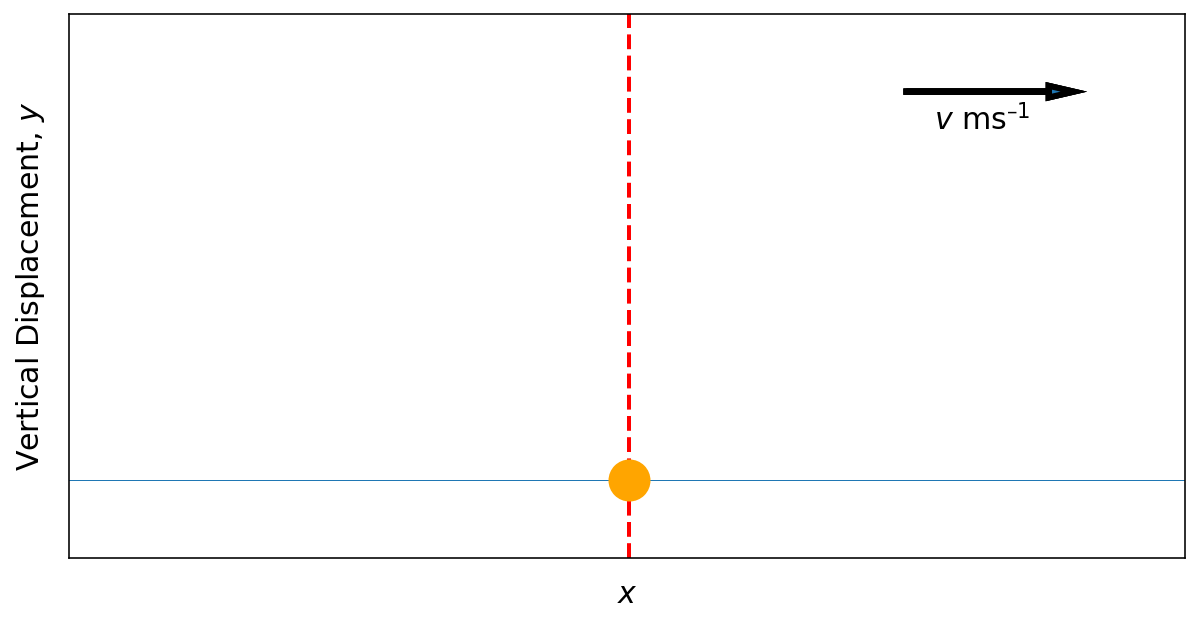

In [16]:
data_points = 1000
x_data_range = np.linspace(-1,5,data_points)
x_pulse_range = np.linspace(0,1,250)
amplitude = 1
x_pulse_func = amplitude*(np.sin(x_pulse_range*np.pi))**2 
time_coord = 0
size_of_font = 15
sample = 500


fig, ax = plt.subplots(figsize=(10,5))

ax.set_xlim(( 1, 3))
ax.set_ylim((-0.2*np.max(x_pulse_func)), 1.2*np.max(x_pulse_func))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylabel('Vertical Displacement, $y$',fontsize=size_of_font)
ax.set_xlabel('$x$',fontsize=size_of_font)
plt.tick_params(bottom=False,left=False)



ax.axvline(x=x_data_range[sample],linewidth=2,color='r',linestyle="--")

arrow = plt.arrow(2.5,1,0.3,0, lw=3, length_includes_head=True, head_width=0.03)

label=ax.annotate("$v$ ms$^{–1}$", xy=(2.55, 0.9),fontsize=size_of_font)


line, = ax.plot([], [], lw=0.5,linestyle='-') # Function for drawing a line


point, = ax.plot([],[],'o',markersize=20,color='orange') # Function to plot a point

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    point.set_data([],[])
    ax.add_patch(arrow)
    return (line,point,)

def animate(i):
    zero_arr = np.zeros(data_points,dtype=float)
    pulse_arr = np.insert(zero_arr,20*i,x_pulse_func) # ith step here
    pulse_arr_trunc = pulse_arr[:data_points]
#    y_point = pulse_arr[sample]
    line.set_data(x_data_range[:], pulse_arr_trunc[:])
    point.set_data(x_data_range[sample],pulse_arr[sample])
#    arrow.set_xdata(x_data_range[:]+0.5,x_data_range[:]+0.7)
    if i == 17:
        plt.savefig('ch6-wavepulse1.pdf',transparent=True)
    return (line,)

# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=20, blit=True)
#anim
anim.save('ch6-wavepulse1.gif', writer='imagemagick', fps=25)
#plt.savefig('ch6-wavepulse1.pdf',transparent=True)

In [5]:
anim

### Changing wave pulse reference frame

1. Plot wave pulse on its own
1. Animate the moving axes
    1. Can this be a moving box?

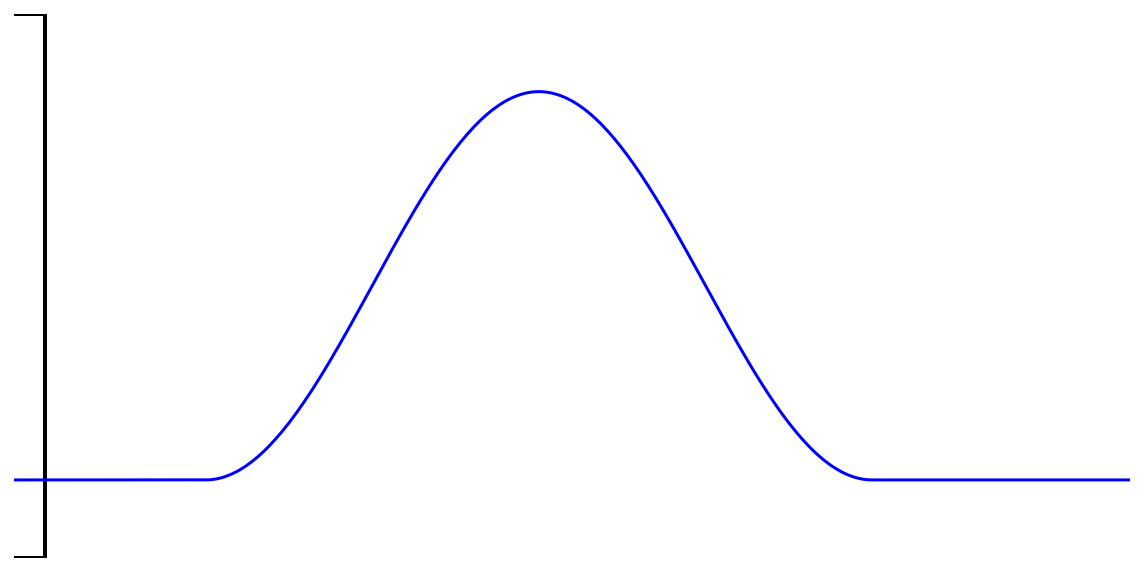

In [231]:
data_points = 1000
x_data_range = np.linspace(-1,5,data_points)
#x_data_range_ext = np.linspace(-1,4,data_points)
x_flip = np.flip(x_data_range,axis=0)
x_pulse_range = np.linspace(0,1,200)
amplitude = 1
x_pulse_func = amplitude*(np.sin(x_pulse_range*np.pi))**2 
time_coord = 0
size_of_font = 15
sample = 500

# Build the pulse plot
zero_arr = np.zeros(data_points,dtype=float)
pulse_arr = np.insert(zero_arr,390,x_pulse_func) # ith step here
pulse_arr_trunc = pulse_arr[:data_points]
pulse_arr_trunc2 = pulse_arr[:data_points+167]
y_flip = np.flip(pulse_arr_trunc2,axis=0)


fig, ax = plt.subplots(figsize=(10,5))

ax.set_xlim(( 1, 3))
ax.set_ylim((-0.2*np.max(x_pulse_func)), 1.2*np.max(x_pulse_func))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylabel('',fontsize=size_of_font)
ax.set_xlabel('',fontsize=size_of_font)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.tick_params(bottom=False,left=False)



# Stuff to animate...
#ax.axvline(x=x_data_range[sample],linewidth=0.5,color='r',linestyle="--")
rect = patches.Rectangle((1,-0.2*np.max(x_pulse_func)),2,(1.4*np.max(x_pulse_func)),
                         linewidth=2,edgecolor='k',facecolor='none')
line1, =ax.plot([0,0],[-0.2*np.max(x_pulse_func),1.2*np.max(x_pulse_func)],lw=2,linestyle='-',color='r') # [x1,x2],[y1,y2]
point, = ax.plot([0],[0],'o',markersize=20,color='orange')
#ax.add_patch(rect)

# Stuff that stays still
ax.plot(x_data_range,pulse_arr_trunc,color='b')

def init():
    ax.add_patch(rect)
    ax.add_line(line1)
    point.set_data([],[])    
    return rect, line1, point,

def animate(i):
    rect.set_xy([x_flip[10*i],-0.2*np.max(x_pulse_func)])
    line1.set_xdata(x_flip[10*i]+1)
    point.set_data(x_flip[10*i]+1,y_flip[10*i])
    if i == 75:
        plt.savefig('ch6-wavepulse2.pdf',transparent=True)
    return rect, line1,

anim = animation.FuncAnimation(fig,animate,init_func=init,
                               frames=100,interval=50,blit=True)

anim.save('ch6-wavepulse2.gif', writer='imagemagick', fps=25)





### It's not fucking working.
Let's try this from stackexchange https://stackoverflow.com/questions/31921313/matplotlib-animation-moving-square


In [79]:
len(pulse_arr_trunc)


1000

In [80]:
len(x_pulse_range)

250

### Trying to animate a longitudinal wave
This may have to wait...

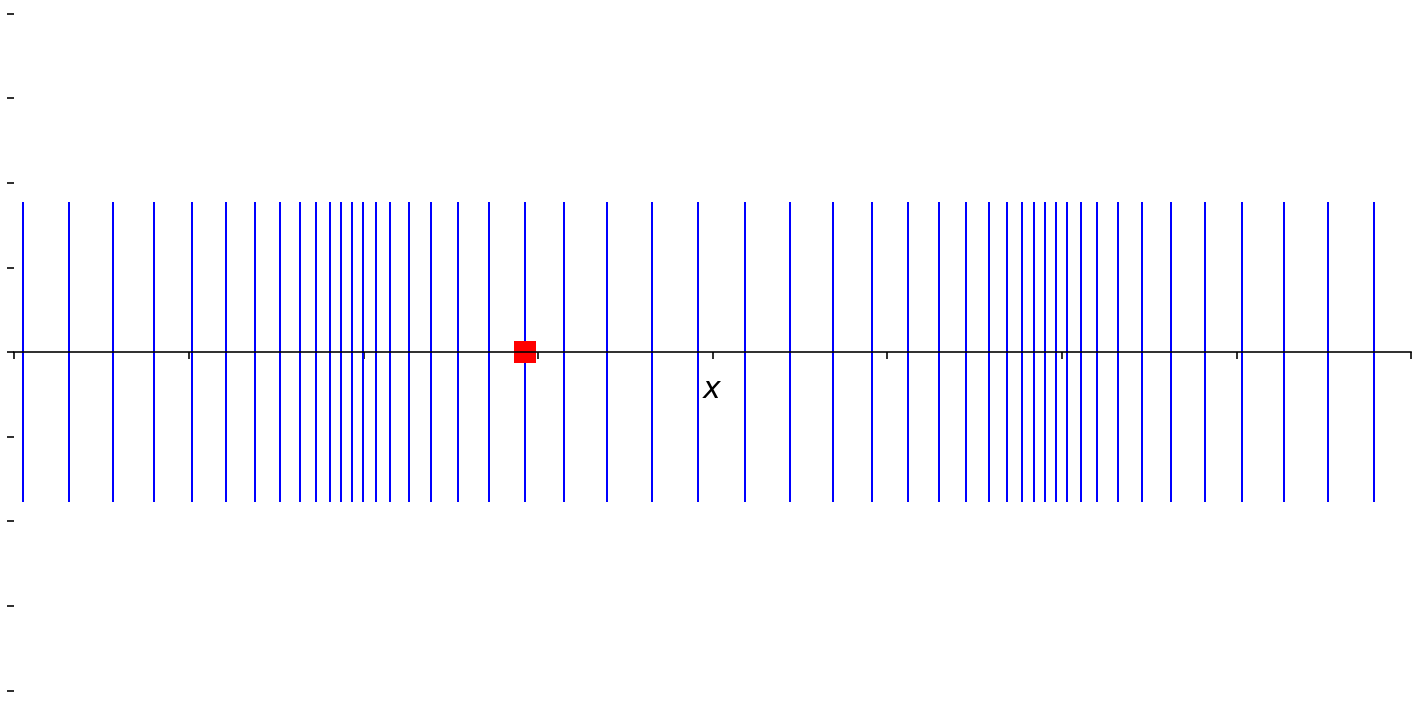

In [9]:
size_of_font = 15

duration_of_anim = 2 #seconds
frames_per_second = 10

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
sample = 2
number_of_points = 20
x_limit = 2

x = np.linspace(0, 2, 50)

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(10,5))

ax.set_xlim(( 0, 2))
ax.set_ylim((-0.2, 0.2))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylabel('',fontsize=size_of_font)
ax.set_xlabel('$x$',fontsize=size_of_font)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)#(("data",0))
ax.spines["bottom"].set_position(("data",0))

#ax.axvline(x=x[sample],linewidth=0.5,color='r',linestyle="--")



line, = ax.plot([], [], lw=0.5,linestyle='-')

point, = ax.plot([],[],'|',markersize=150,color='blue')
point2, = ax.plot([],[],'s',markersize=10,color='red')



# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    point.set_data([],[])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    y = 0.1*np.sin(2 * np.pi * (x - 0.02 * i)) # The scalar on i helps us with the frame rates! scalar*frames must equal 1
#    y_point=np.sin(2*np.pi*(x[sample]-0.01*i)) 
#    line.set_data(x, y)
    point.set_data(x+y,0)
    point2.set_data((x[20]+y[20],0))
    return (point,)


# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=20, blit=True)
#anim
plt.tight_layout()
anim.save('ch6-longitudinalwave1.gif', writer='imagemagick', fps=30)
plt.savefig('ch6-longitudinalwave1.pdf',transparent=True)

anim

## Reference frames again

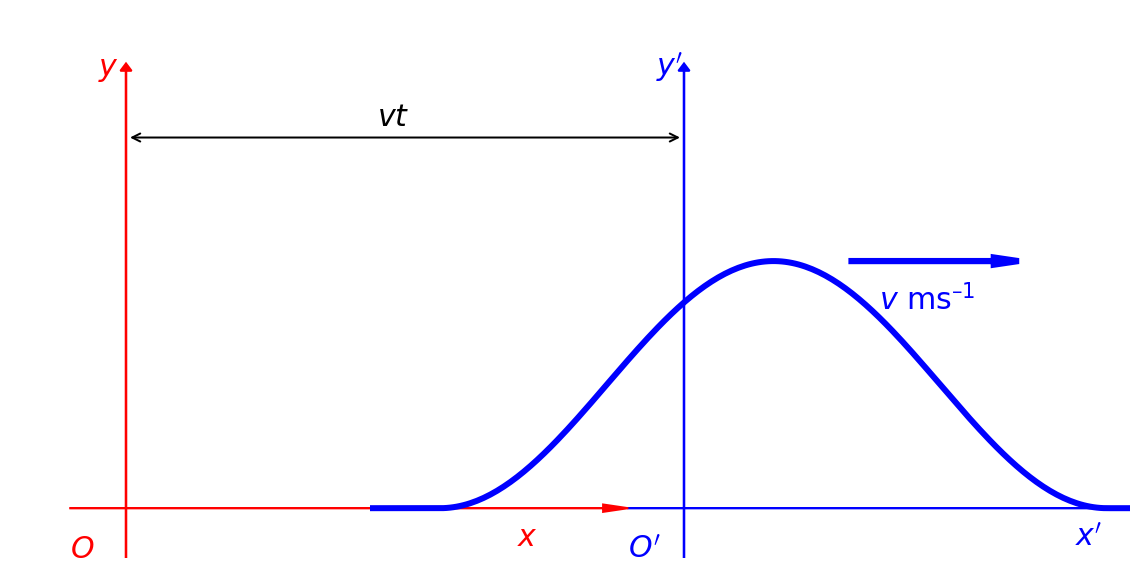

In [284]:
data_points = 1000
x_data_range = np.linspace(-1,5,data_points)
#x_data_range_ext = np.linspace(-1,4,data_points)
x_flip = np.flip(x_data_range,axis=0)
x_pulse_range = np.linspace(0,1,200)
amplitude = 1
x_pulse_func = amplitude*(np.sin(x_pulse_range*np.pi))**2 
time_coord = 0
size_of_font = 15
sample = 500

# Build the pulse plot
zero_arr = np.zeros(data_points,dtype=float)
pulse_arr = np.insert(zero_arr,460,x_pulse_func) # ith step here
pulse_arr_trunc = pulse_arr[:data_points]
#pulse_arr_trunc2 = pulse_arr[:data_points+167]
#y_flip = np.flip(pulse_arr_trunc2,axis=0)


fig, ax = plt.subplots(figsize=(10,5))

ax.set_xlim(( 1, 3))
ax.set_ylim((-0.2*np.max(x_pulse_func)), 2*np.max(x_pulse_func))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylabel('',fontsize=size_of_font)
ax.set_xlabel('',fontsize=size_of_font)
#ax.set_aspect('equal')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.tick_params(bottom=False,left=False)

ax.plot(x_data_range[440:],pulse_arr_trunc[440:],color='b',lw=3)

#ax.plot([0,0],[-0.2*np.max(x_pulse_func),1.2*np.max(x_pulse_func)],lw=2,linestyle='-',color='r') # [x1,x2],[y1,y2]

plt.arrow(2.2,-0.2*np.max(x_pulse_func),0,2*np.max(x_pulse_func), lw=1, length_includes_head=True, head_width=0.02, color='b')
plt.arrow(2.1,0,1,0, lw=1, length_includes_head=True, head_width=0.03, color='b')
ax.annotate("$x'$", xy=(2.9, -0.15),fontsize=size_of_font, color='b')
ax.annotate("$y'$", xy=(2.15, 1.75),fontsize=size_of_font, color='b')
ax.annotate("$O'$", xy=(2.1, -0.2),fontsize=size_of_font, color='b')



plt.arrow(1.2,-0.2*np.max(x_pulse_func),0,2*np.max(x_pulse_func), lw=1, length_includes_head=True, head_width=0.02, color='r')
plt.arrow(1.1,0,1,0, lw=1, length_includes_head=True, head_width=0.03, color='r')
ax.annotate("$x$", xy=(1.9, -0.15),fontsize=size_of_font, color='r')
ax.annotate("$y$", xy=(1.15, 1.75),fontsize=size_of_font, color='r')
ax.annotate("$O$", xy=(1.1, -0.2),fontsize=size_of_font, color='r')

plt.arrow(2.5,1,0.3,0, lw=3, length_includes_head=True, head_width=0.03, color='b')
ax.annotate("$v$ ms$^{–1}$", xy=(2.55, 0.8),fontsize=size_of_font, color='b')


plt.annotate(s='', xy=(1.2,1.5), xytext=(2.2,1.5), arrowprops=dict(arrowstyle='<->'))

ax.annotate("$vt$", xy=(1.65, 1.55),fontsize=size_of_font)

plt.savefig('ch6-wavepulse3.pdf',transparent=True)
plt.savefig('ch6-wavepulse3.svg',transparent=True)



plt.show()

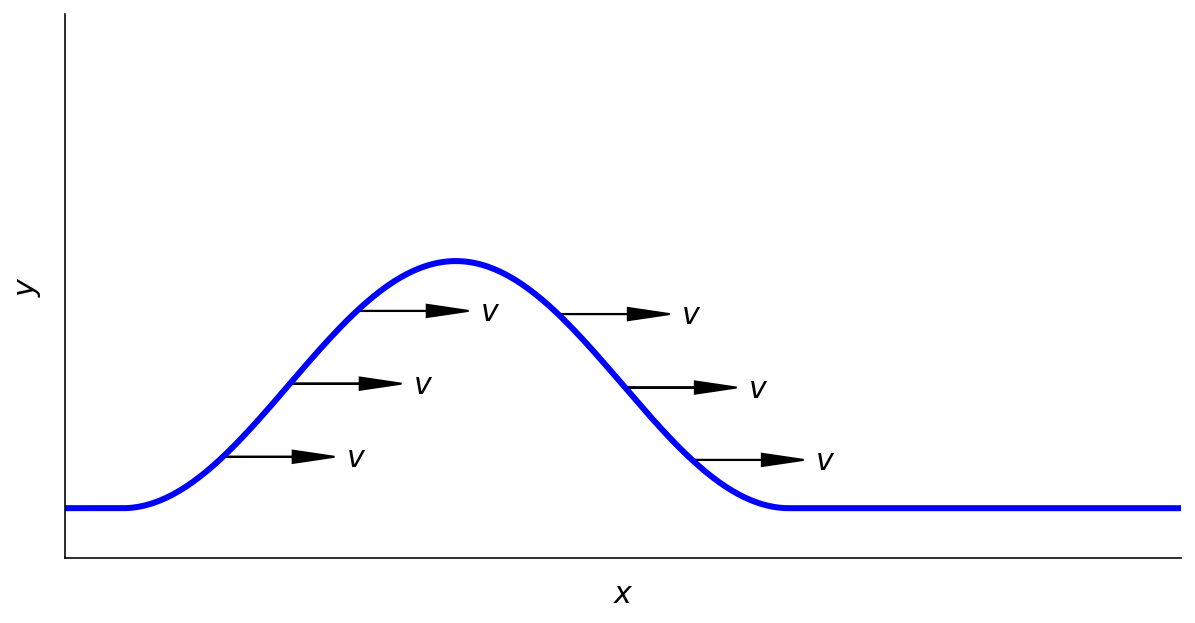

In [310]:
data_points = 1000
x_data_range = np.linspace(-1,5,data_points)
#x_data_range_ext = np.linspace(-1,4,data_points)
x_flip = np.flip(x_data_range,axis=0)
x_pulse_range = np.linspace(0,1,200)
amplitude = 1
x_pulse_func = amplitude*(np.sin(x_pulse_range*np.pi))**2 
time_coord = 0
size_of_font = 15
sample = 500

# Build the pulse plot
zero_arr = np.zeros(data_points,dtype=float)
pulse_arr = np.insert(zero_arr,350,x_pulse_func) # ith step here
pulse_arr_trunc = pulse_arr[:data_points]
#pulse_arr_trunc2 = pulse_arr[:data_points+167]
#y_flip = np.flip(pulse_arr_trunc2,axis=0)


fig, ax = plt.subplots(figsize=(10,5))

ax.set_xlim(( 1, 3))
ax.set_ylim((-0.2*np.max(x_pulse_func)), 2*np.max(x_pulse_func))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylabel('$y$',fontsize=size_of_font)
ax.set_xlabel('$x$',fontsize=size_of_font)
#ax.set_aspect('equal')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
plt.tick_params(bottom=False,left=False)

ax.plot(x_data_range[:],pulse_arr_trunc[:],color='b',lw=3)

arrow_label = [380,400,420,480,500,520]

#arrow_1 = 380
#arrow_2 = 520
#arrow_3 = 1
#arrow_4 = 1
#arrow_5 = 1
#arrow_6 = 1

#plt.arrow(x_data_range[arrow_1],pulse_arr_trunc[arrow_1],0.2,0, lw=1, length_includes_head=True, head_width=0.05, color='k')
#plt.arrow(x_data_range[arrow_2],pulse_arr_trunc[arrow_2],0.2,0, lw=1, length_includes_head=True, head_width=0.05, color='k')

#ax.annotate("$vt$", xy=(x_data_range[arrow_1]+0.22,pulse_arr_trunc[arrow_1]-0.04),fontsize=size_of_font)

for i in arrow_label:
    plt.arrow(x_data_range[i],pulse_arr_trunc[i],0.2,0, lw=1, length_includes_head=True, head_width=0.05, color='k')
    ax.annotate("$v$", xy=(x_data_range[i]+0.22,pulse_arr_trunc[i]-0.04),fontsize=size_of_font)



#ax.plot([0,0],[-0.2*np.max(x_pulse_func),1.2*np.max(x_pulse_func)],lw=2,linestyle='-',color='r') # [x1,x2],[y1,y2]

#plt.arrow(2.2,-0.2*np.max(x_pulse_func),0,2*np.max(x_pulse_func), lw=1, length_includes_head=True, head_width=0.02, color='b')
#plt.arrow(2.1,0,1,0, lw=1, length_includes_head=True, head_width=0.03, color='b')
#ax.annotate("$x'$", xy=(2.9, -0.15),fontsize=size_of_font, color='b')
#ax.annotate("$y'$", xy=(2.15, 1.75),fontsize=size_of_font, color='b')
#ax.annotate("$O'$", xy=(2.1, -0.2),fontsize=size_of_font, color='b')
#
#
#
#plt.arrow(1.2,-0.2*np.max(x_pulse_func),0,2*np.max(x_pulse_func), lw=1, length_includes_head=True, head_width=0.02, color='r')
#plt.arrow(1.1,0,1,0, lw=1, length_includes_head=True, head_width=0.03, color='r')
#ax.annotate("$x$", xy=(1.9, -0.15),fontsize=size_of_font, color='r')
#ax.annotate("$y$", xy=(1.15, 1.75),fontsize=size_of_font, color='r')
#ax.annotate("$O$", xy=(1.1, -0.2),fontsize=size_of_font, color='r')

#plt.arrow(2.5,1,0.3,0, lw=3, length_includes_head=True, head_width=0.03, color='b')
#ax.annotate("$v$ ms$^{–1}$", xy=(2.55, 0.8),fontsize=size_of_font, color='b')


#plt.annotate(s='', xy=(1.2,1.5), xytext=(2.2,1.5), arrowprops=dict(arrowstyle='<->'))
#
#ax.annotate("$vt$", xy=(1.65, 1.55),fontsize=size_of_font)

plt.savefig('ch6-phasevelocity1.pdf',transparent=True)
plt.savefig('ch6-phasevelocity1.svg',transparent=True)



plt.show()